# EarthVQA

In [22]:
import json
import os
from matplotlib import pyplot as plt
from PIL import Image

json_path = "/home/vol-llm/datasets/ISR/EarthVQA/Val_QA.json"  # replace with your path

with open(json_path, 'r') as f:
    qa_data = json.load(f)


num_sample = 10 # change if needed
sample_img_list = list(qa_data.keys())[:num_sample]
print("Total images in the dataset:", len(qa_data))
print("Sample image filenames:", sample_img_list)


Total images in the dataset: 1669
Sample image filenames: ['2966.png', '3353.png', '3327.png', '2640.png', '2851.png', '2926.png', '3502.png', '3277.png', '3439.png', '3294.png']


In [28]:
from collections import Counter

img_folder = "/home/vol-llm/datasets/ISR/EarthVQA/Val/images_png"

# enumerate img_filename from sample_img_list
for idx, img_filename in enumerate(sample_img_list, 1):
    print(f"img index: {idx}; img name: {img_filename}")

    img_path = os.path.join(img_folder, img_filename)
    qa_list = qa_data.get(img_filename, [])

    print(f"\tNumber of questions: {len(qa_list)}")

    # Count question types
    question_types = [qa['Type'] for qa in qa_list]
    type_counts = Counter(question_types)

    print("\tQuestion type distribution:")
    for qtype, count in type_counts.items():
        print(f"\t\t{qtype}: {count}")



img index: 1; img name: 2966.png
	Number of questions: 29
	Question type distribution:
		Basic Judging: 7
		Basic Counting: 7
		Reasoning-based Judging: 9
		Comprehensive Analysis: 4
		Reasoning-based Counting: 1
		Object Situation Analysis: 1
img index: 2; img name: 3353.png
	Number of questions: 29
	Question type distribution:
		Basic Judging: 7
		Basic Counting: 7
		Reasoning-based Judging: 9
		Comprehensive Analysis: 4
		Reasoning-based Counting: 1
		Object Situation Analysis: 1
img index: 3; img name: 3327.png
	Number of questions: 29
	Question type distribution:
		Basic Judging: 7
		Basic Counting: 7
		Reasoning-based Judging: 9
		Comprehensive Analysis: 4
		Reasoning-based Counting: 1
		Object Situation Analysis: 1
img index: 4; img name: 2640.png
	Number of questions: 29
	Question type distribution:
		Basic Judging: 7
		Basic Counting: 7
		Reasoning-based Judging: 9
		Comprehensive Analysis: 4
		Reasoning-based Counting: 1
		Object Situation Analysis: 1
img index: 5; img name: 

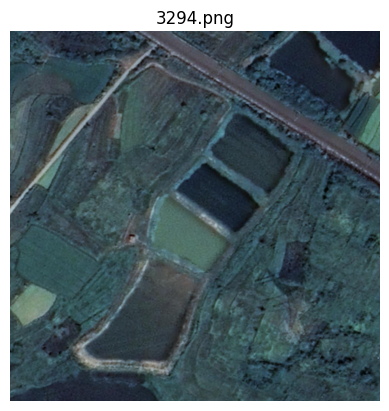

1. [Basic Judging] Are there any buildings in this scene?
   → Answer: No

2. [Basic Counting] What is the area of buildings?
   → Answer: 0%-10%

3. [Basic Judging] Are there any roads in this scene?
   → Answer: Yes

4. [Basic Counting] What is the area of roads?
   → Answer: 0%-10%

5. [Basic Judging] Is there any water in this scene?
   → Answer: Yes

6. [Basic Counting] What is the area of water?
   → Answer: 10%-20%

7. [Basic Judging] Is there any barren in this scene?
   → Answer: No

8. [Basic Counting] What is the area of barren?
   → Answer: 0%-10%

9. [Basic Judging] Is there any forest in this scene?
   → Answer: No

10. [Basic Counting] What is the area of the forest?
   → Answer: 0%-10%

11. [Basic Judging] Is there any agriculture in this scene?
   → Answer: No

12. [Basic Counting] What is the area of agriculture?
   → Answer: 0%-10%

13. [Basic Judging] Are there any playgrounds in this scene?
   → Answer: No

14. [Basic Counting] What is the area of playgrounds?
   →

In [35]:

img = Image.open(img_path)
plt.imshow(img)
plt.axis('off')
plt.title(img_filename)
plt.show()

for i, qa in enumerate(qa_list, 1):
    print(f"{i}. [{qa['Type']}] {qa['Question']}")
    print(f"   → Answer: {qa['Answer']}\n")


## Craft EarthVQA-n600

Sample N questions per type from original dataset.

In [ ]:
["Basic Judging", "Basic Counting", "Reasoning-based Judging", "Comprehensive Analysis", "Reasoning-based Counting", "Object Situation Analysis"]

In [ ]:
import json
import random
from collections import defaultdict
import os

# === Configuration ===
input_json_path = "/home/vol-llm/datasets/ISR/EarthVQA/Val_QA.json"
# output_json_path = "EarthVQA-n600.json"
output_json_path = "result.json" # TESTING
samples_per_type = 3  # TODO: You can change this to any number

# === Load JSON ===
with open(input_json_path, 'r') as f:
    data = json.load(f)

# === Group by Question Type ===
type_to_entries = defaultdict(list)
for img_name, qa_list in data.items():
    for qa in qa_list:
        entry = {
            "Image Name": img_name,
            "Question Type": qa["Type"],
            "Question": qa["Question"],
            "Label": qa["Answer"],
            "Answer": qa["Answer"] # TESTING
        }
        type_to_entries[qa["Type"]].append(entry)

# === Sample N per type ===
final_samples = []
qid = 1 # NOTE: start from 1
for qtype, entries in type_to_entries.items():
    sampled = random.sample(entries, min(samples_per_type, len(entries)))
    for item in sampled:
        item["Question ID"] = qid
        qid += 1
        final_samples.append(item)

# === Save to JSON ===
with open(output_json_path, 'w') as f:
    json.dump(final_samples, f, indent=2)

print(f"Saved {len(final_samples)} total QA pairs into '{output_json_path}'")

# === Print 3 random samples for validation ===
print("\n--- 3 Sampled Entries ---")
for sample in random.sample(final_samples, 3):
    print(json.dumps(sample, indent=2))


Saved 18 total QA pairs into 'result.json'

--- 3 Sampled Entries ---
{
  "Image Name": "3640.png",
  "Question Type": "Basic Judging",
  "Question": "Is there any agriculture in this scene?",
  "Label": "Yes",
  "Answer": "Yes",
  "Question ID": 1
}
{
  "Image Name": "3133.png",
  "Question Type": "Object Situation Analysis",
  "Question": "What are the water types in this scene?",
  "Label": "There are ponds",
  "Answer": "There are ponds",
  "Question ID": 18
}
{
  "Image Name": "3625.png",
  "Question Type": "Reasoning-based Judging",
  "Question": "Is it a rural or urban scene?",
  "Label": "Urban",
  "Answer": "Urban",
  "Question ID": 7
}
